# ML courses 5 & 6 - Practice on logistic regression and classification assessment

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Data preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

**Loading the data set from Scikit-Learn**

In [2]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**   
Sklearn returns the dataset in the form of a dictionary. The actual dataset is stored under 'data', but there are other keys that give access to more information.

In [3]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

**Getting a description of the data set**

In [4]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [5]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [7]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


In [8]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

**To make it easier to do visual check of the data, we remove the encoding**

In [9]:
target = target.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


## Your Mission

We have here a large data set that could help predict if a tumor is benign or malignant based on its characteristics. In this work, we will focus on a small number of predictors that we will use to train and assess logistic regressions.

<font color=red><b>Questions in red have to be answered only after lecture session 6 (classification assessment).</font>

* We check at first if the tumor radius is a good predictor for breast cancer.
  1. Perform data exploration on mean radius, taking into account the target class attributions. Do you think mean radius can make an good predictor of tumor type?
  2. Encode the target variable ("tumor type") and make sure you code 0 as 'benign' and 1 as 'malignant'.
  3. Plot the target variable with respect to mean radius (scatter plot). Do you think a logistic regression model can model the relationship between the two variables reasonably well? Why or why not?    
  4. Train a logistic regression model.
  5. Reproduce the plot you made in question (3) and add a curve to show the probability of having a malignant tumor for any value of _mean radius,_ according to your logistic regression model.  
  More formally: $P\left( Y=1 \left| X=x \right. \right)$ _where $Y$ is the tumor type and $x$ is the mean radius._
  6. According to your model, what is the minimum _mean radius_ value for considering that the tumor is malignant?  
  Make a few predictions with your model with different values of _mean radius_ to check your intuition.
  7. <font color=red>Compute and display the confusion matrix. Compute the accuracy, precision and recall "by hand" from the confusion matrix. Compute the f1-score as well.  
Comment your results. What can you say about your model's performance?</font> 
  8. <font color=red>Imagine that we want to make the diagnosis of breast cancer to be able to treat it if necessary. Should we better focus on increasing the recall or the precision of the prediction? And why?  
    How can we adapt the output of the model to modify the precision/recall of the prediction in this regard?</font>  
  9. <font color=red>BONUS: Tweak your model's prediction the way you proposed in your answer of question 8. Show results demonstrating if its predictions have become more appropriate for cancer diagnosis. Comment your results.</font>
* We decide to add an extra predictor to our model.
  10. Inspect the data in order to tell —  between mean texture, mean perimeter, and mean area — which is the most relevant predictor to choose (in addition to mean radius).
  11. Re-train your logistic regression with your two predictors (mean radius and the one you have picked).
  12. <font color=red>How has the classification performance increased?</font>
* Comparison of the two models: 
  13. <font color=red>Plot the ROC curves of the two previous models and make the comparison.</font> 
  14. <font color=red>Compute the LogLoss values of the two previous models and make the comparison.</font> 

In [10]:
# We check at first if the tumor radius is a good predictor for breast cancer.
pred = features.loc[:, 'mean radius']
pred.sample(n=8, random_state=1)


421    14.69
47     13.17
292    12.95
186    18.31
414    15.13
132    16.16
161    19.19
197    18.08
Name: mean radius, dtype: float64

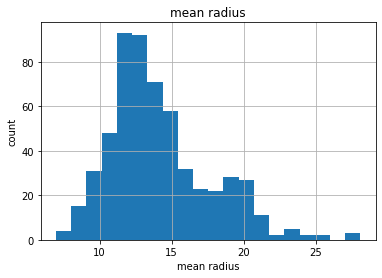

In [11]:
# 1. Perform data exploration on mean radius, taking into account the target class attributions. Do you think mean radius can make an good predictor of tumor type?
features['mean radius'].hist(bins=20)
plt.xlabel('mean radius')
plt.ylabel('count')
plt.title('mean radius')
plt.show()


data looks linear, can be modeled by a logistic regression model.

In [12]:
#   2. Encode the target variable ("tumor type") and make sure you code 0 as 'benign' and 1 as 'malignant'.
features['tumor type'] = target
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


In [13]:
#   2. Encode the target variable ("tumor type") and make sure you code 0 as 'benign' and 1 as 'malignant'.
from sklearn.preprocessing import LabelEncoder

features['tumor type'] = target
lencoder = LabelEncoder()
features['tumor type'] = lencoder.fit_transform(features['tumor type'])
features['tumor type'].sample(n=8, random_state=1)


421    0
47     1
292    0
186    1
414    1
132    1
161    1
197    1
Name: tumor type, dtype: int64

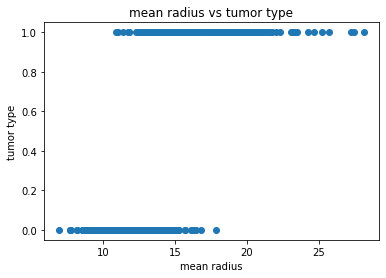

In [14]:
#   3. Plot the target variable with respect to mean radius (scatter plot). Do you think a logistic regression model can model the relationship between the two variables reasonably well? Why or why not?    
plt.scatter(features['mean radius'], features['tumor type'])
plt.xlabel('mean radius')
plt.ylabel('tumor type')
plt.title('mean radius vs tumor type')
plt.show()

- Do you think a logistic regression model can model the relationship between the two variables reasonably well? Why or why not? 
<p>I think a logistic regression model can model the relationship between the two variables reasonably well because the relationship is not linear.

In [15]:
from sklearn.model_selection import train_test_split

X = features.values
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 31) (426, 1)
Test set: (143, 31) (143, 1)


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
#   4. Train a logistic regression model.
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(features, target)

/Users/zx/miniconda3/envs/FSAML/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zx/miniconda3/envs/FSAML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# probability of tumor type

y_proba = lreg.predict_proba(X_test)
y_proba[:10]

/Users/zx/miniconda3/envs/FSAML/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[1.94593407e-04, 9.99805407e-01],
       [9.92810989e-01, 7.18901149e-03],
       [9.94414872e-01, 5.58512814e-03],
       [9.87922389e-01, 1.20776110e-02],
       [9.98748493e-01, 1.25150699e-03],
       [9.15575966e-01, 8.44240341e-02],
       [8.87009094e-01, 1.12990906e-01],
       [9.76352563e-01, 2.36474368e-02],
       [9.57793331e-01, 4.22066686e-02],
       [9.74887776e-01, 2.51122240e-02]])

In [19]:
y_pred = lreg.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),axis=1)[:10])

[['malignant' 'malignant']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']
 ['benign' 'benign']]


/Users/zx/miniconda3/envs/FSAML/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


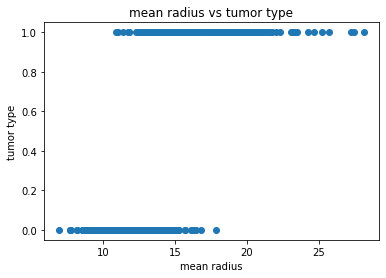

In [20]:
# 5. Reproduce the plot you made in question (3) and add a curve to show the probability of having a malignant tumor for any value of _mean radius,_ according to your logistic regression model. 

plt.scatter(features['mean radius'], features['tumor type'])
plt.xlabel('mean radius')
plt.ylabel('tumor type')
plt.title('mean radius vs tumor type')
plt.show()

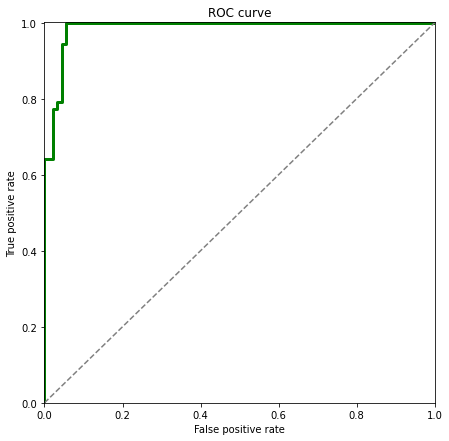

In [21]:
# add curve
from sklearn.metrics import roc_curve, roc_auc_score

y_score = y_proba[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score, pos_label='malignant')

plt.subplots(1, figsize=(7,7))
plt.plot(false_positive_rate, true_positive_rate, c='green', linewidth=3)

plt.title('ROC curve')
plt.plot([0, 1], ls="--", c='grey')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

plt.show()

In [22]:
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor type
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208,0
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790,1
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584,0
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938,1
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165,1
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619,1
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251,1
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558,1


In [23]:
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


In [24]:
#  6. According to your model, what is the minimum mean radius value for considering that the tumor is malignant?
i = features[((features['tumor type'] == 1))].index
min(features.loc[i, 'mean radius'])

10.95

In [25]:
# 7. Compute and display the confusion matrix. Compute the accuracy, precision and recall "by hand" from the confusion matrix. Compute the f1-score as well.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  6]
 [ 0 53]]


<AxesSubplot:>

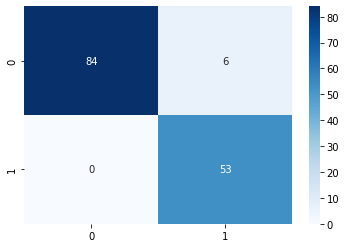

In [26]:
# confusioin matrix with seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [27]:
# 7. Compute and display the confusion matrix. Compute the accuracy, precision and recall "by hand" from the confusion matrix. Compute the f1-score as well.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, y_pred),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, y_pred, pos_label='malignant'),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, y_pred, pos_label='malignant'),2)))
print('F1 score (combined measure of precision and recall) is ' + str(round(f1_score(y_test, y_pred, pos_label='malignant'), 2)))

Accuracy (proportion of correct predictions) is 0.96
Precision (proportion of true purchases among purchase predictions) is 0.9
Recall (proportion of true purchases that are correctly predicted) is 1.0
F1 score (combined measure of precision and recall) is 0.95


#### 8. Imagine that we want to make the diagnosis of breast cancer to be able to treat it if necessary. Should we better focus on increasing the recall or the precision of the prediction? And why?

- We better focus on increasing the precision of the prediction because we want to be able to predict the tumor type of a tumor that is not malignant.

<AxesSubplot:>

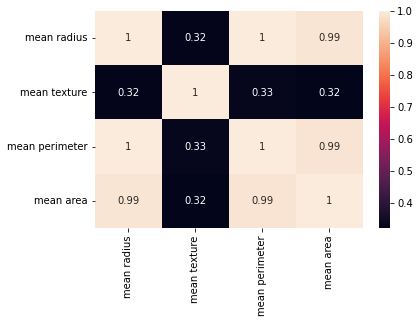

In [28]:
# 10. Inspect the data in order to tell —  between mean texture, mean perimeter, and mean area — which is the most relevant predictor to choose (in addition to mean radius).
sns.heatmap(features[['mean radius', 'mean texture', 'mean perimeter', 'mean area']].corr(), annot=True)

#### All 3 columns except mean texture can be good predictors

In [29]:
# 11. Re-train your logistic regression with your two predictors (mean radius and the one you have picked).
logreg = LogisticRegression()
logreg.fit(features[['mean radius', 'mean texture']].values, target)

# train the model
# y_proba = logreg.predict_proba(X_test)
# y_pred = logreg.predict(X_test)

/Users/zx/miniconda3/envs/FSAML/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [30]:
# probability array
y_proba = logreg.predict_proba(X_test[:, [0, 2]])
y_proba[:10]

array([[9.99999998e-01, 2.21870404e-09],
       [9.99999998e-01, 2.01487479e-09],
       [9.99999997e-01, 2.68635235e-09],
       [9.99999997e-01, 2.92541621e-09],
       [9.99999998e-01, 1.88559001e-09],
       [9.99999999e-01, 1.04957592e-09],
       [9.99999999e-01, 1.36474718e-09],
       [9.99999999e-01, 1.18351640e-09],
       [1.00000000e+00, 2.90376453e-10],
       [9.99999999e-01, 7.20101101e-10]])

In [31]:
y_pred = logreg.predict(X_test[:, [0, 2]])

In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[90  0]
 [53  0]]


<AxesSubplot:>

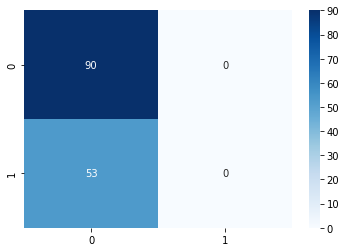

In [38]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

#### 12. How has the classification performance increased?

- Performance has decreased instead due to the new predictors

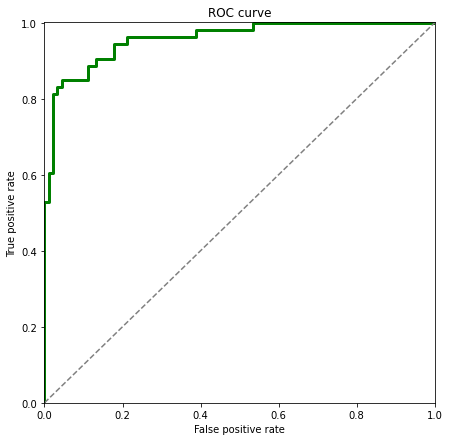

In [37]:
# 13. Plot the ROC curves of the two previous models and make the comparison.
y_score = y_proba[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score, pos_label='malignant')

plt.subplots(1, figsize=(7,7))
plt.plot(false_positive_rate, true_positive_rate, c='green', linewidth=3)

plt.title('ROC curve')
plt.plot([0, 1], ls="--", c='grey')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

plt.show()

In [34]:
print('AUC: ', roc_auc_score(y_test, y_score))

AUC:  0.9582809224318658


In [35]:
# 14. Compute the LogLoss values of the two previous models and make the comparison.
from sklearn.metrics import log_loss

lloss = log_loss(y_test, y_score)
print('LogLoss: ', lloss)


LogLoss:  6.855274316264555
